410921202 資工三 林芷萱

410921209 資工三 張昀萱

In [ ]:
!pip install pandas 
!pip install numpy 
!pip install matplotlib 
!pip install seaborn
!pip install scikit-surprise
!pip install statistics 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, io, collections
import statistics
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the dataset**

# Rating Data
**u.data**
* 943 個用戶對 1682 個項目的 100000 個評分
* user id | item id | rating | timestamp(時間戳) 

In [ ]:
# 載入 movie rating data 到 dataframe 中
rating_header = ["user id", "movie id", "rating", "timestamp"]
rating = pd.read_csv("/content/drive/MyDrive/Recommendation System/u.data", sep = '\t', header = None, names=rating_header)
rating.head(1)

,user id,movie id,rating,timestamp
0,196,242,3,881250949


# User Data
**u.user**
* 有關用戶的人口統計信息
* user id | age | gender | occupation | zip code(郵政編碼)
* user id 是 u.data 中使用的

In [ ]:
# 載入 user data 到 dataframe 中
user_header = ["user id", "age", "gender", "occupation", "zip code"]
users = pd.read_csv("/content/drive/MyDrive/Recommendation System/u.user", sep = '|', header = None, names=user_header)
users.head(1)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711


# Movie Data
**u.item**
* 有關項目（電影）的信息

* movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western |              

* 最後 19 個字段是genres，1 表示電影屬於該genre，0 表示不是； 電影可以同時有多種類型。
* movie id 與 u.data 中的 item id 相同


In [ ]:
# 載入 movie data 到 dataframe 中
movie_header = ["movie id", "movie title", "release date", "video release date", "IMDb URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("/content/drive/MyDrive/Recommendation System/u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)
movies = movies.drop(columns=['video release date']) # 移除沒用到的資料
movies.head(1)

,movie id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# **Data Transformation and Combination**

**字串 數字化**

Gender  性別


In [ ]:
#將 gender 的 F、M 用 0、1 表示 
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True) # F:0, M:1
users_num.head(1)

,user id,age,gender,occupation,zip code
0,1,24,1,technician,85711


Occupation 職業

In [ ]:
#將 occupation 的 字串 轉成 index(數字代號)
occupation = pd.read_csv("/content/drive/MyDrive/Recommendation System/u.occupation", header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
users_num.head(1)

,user id,age,gender,occupation,zip code
0,1,24,1,19,85711


# **Data Analysis**

# **Analyze the user data**

**年齡區間轉換函式**
*   0 ~ 9 歲 : 0 歲
*   10 ~ 19 歲 : 10 歲
*   20 ~ 29 歲 : 20 歲
*   30 ~ 39 歲 : 30 歲
*   40 ~ 49 歲 : 40 歲
*   50 ~ 59 歲 : 50 歲
*   60 ~ 69 歲 : 60 歲
*   70 ~ 79 歲 : 70 歲

In [ ]:
def change_age (i): # 0~9 歲 :0 , 10~19 :10
  x =(int)(i/10)
  return(int)(10*x)

User 年齡分布

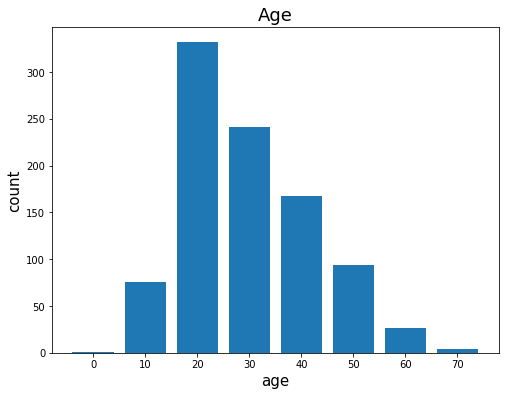

0 ~ 9 歲的人數: 1
10 ~ 19 歲的人數: 76
20 ~ 29 歲的人數: 332
30 ~ 39 歲的人數: 241
40 ~ 49 歲的人數: 168
50 ~ 59 歲的人數: 94
60 ~ 69 歲的人數: 27
70 ~ 79 歲的人數: 4
- - - - - - - - - - - 
最多人數的年齡區段:
20 ~ 29 歲的人數: 332


In [ ]:
user_age = users['age'].apply(change_age) #轉換成年齡區間
user_age_x = np.sort(user_age.unique())
user_age = pd.DataFrame(user_age)
user_age = user_age.groupby('age',as_index=False).size()
fig = plt.figure(figsize=(8,6)) 
plt.bar(user_age_x,user_age['size'],width = 8 )

plt.xlabel('age', fontsize="15")
plt.ylabel('count', fontsize="15")
plt.title('Age', fontsize="18")
plt.show()
for i in range(len(user_age)):
  print(10*i,"~",10*i+9,"歲的人數:",user_age['size'].iloc[i])
user_age_max = user_age[user_age['size']==user_age['size'].max()]
print("- - - - - - - - - - - ")
print("最多人數的年齡區段:")
print(user_age_max['age'].iloc[0],"~",user_age_max['age'].iloc[0]+9,"歲的人數:",user_age_max['size'].iloc[0])

User男女比例

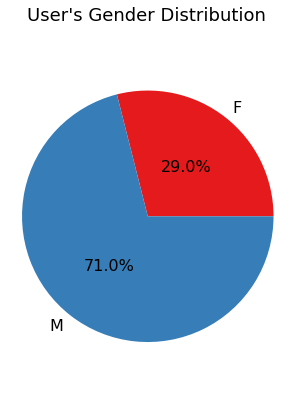

女 : 273 人
男 : 670 人


In [ ]:
gender_count = users[["user id", "gender"]].groupby("gender", as_index=False).size()
fig = plt.figure(figsize=(5,7)) 
plt.pie(gender_count["size"], labels=gender_count['gender'],autopct ="%1.1f%%",pctdistance = 0.5,colors = sns.color_palette("Set1"),textprops = {"fontsize" : 16})
plt.title("User's Gender Distribution",{"fontsize" : 18})
plt.axis("equal")
plt.show()
print("女 :",gender_count['size'].iloc[0],"人")
print("男 :",gender_count['size'].iloc[1],"人")

User職業比例

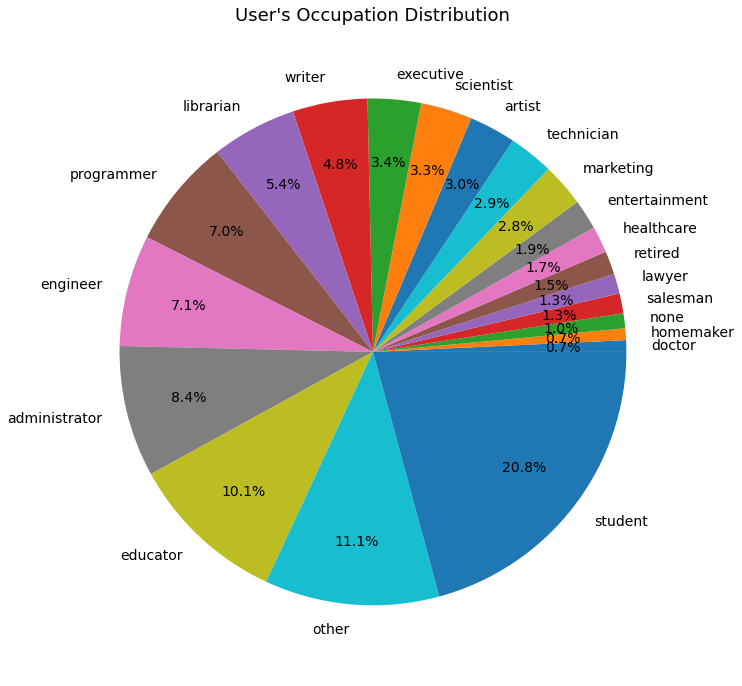

前5大職業:
1 . student  196 人
2 . other  105 人
3 . educator  95 人
4 . administrator  79 人
5 . engineer  67 人


In [ ]:
# occupation 
occupation_count = users[["user id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
occupation_count = occupation_count.sort_values(['size'],ascending=True)# occupation_count['size'] 由小到大排列
fig = plt.figure(figsize=(10,12)) 
plt.pie(occupation_count["size"], labels=occupation_count["occupation"],autopct ="%1.1f%%",pctdistance = 0.75,textprops = {"fontsize" : 14})
plt.title("User's Occupation Distribution",{"fontsize" : 18})
plt.axis("equal")
plt.show()
occupation_count = occupation_count.sort_values(['size'],ascending=False)#改成由大到小排
print("前5大職業:")
for i in range(5):
  print(i+1,".",occupation_count['occupation'].iloc[i],"",occupation_count['size'].iloc[i],"人")

# **Analyze the movie data**

Rating轉換函式


*   數字 : 0 ~ 1.5 => 1
*   數字 : 1.5 ~ 2.5 => 2
*   數字 : 2.5 ~ 3.5 => 3
*   數字 : 3.5 ~ 4.5 => 4
*   數字 : 4.5 ~ 5 => 5


In [ ]:
def change_rating(be):
  if be >= 4.5:
    af = 5
  elif be >= 3.5:
    af = 4
  elif be >= 2.5:
    af = 3
  elif be >= 1.5:
    af = 2
  else :
    af = 1
  return af 

In [ ]:
# Clustering the movies by genre
genre = pd.read_csv("/content/drive/MyDrive/Recommendation System/u.genre", sep = '|', header = None)
genre_list = genre[0].values
movie_set_genre = movies[genre_list]

In [ ]:
movie_set_genre.head(5)

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


# **Rating**

總電影rating分布圖:


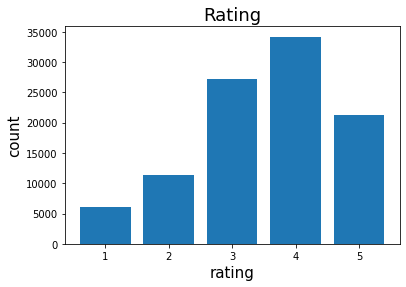

rating=1 : 6110 個
rating=2 : 11370 個
rating=3 : 27145 個
rating=4 : 34174 個
rating=5 : 21201 個


In [ ]:
# rating 分布圖(長條圖)
print("總電影rating分布圖:")
rat_size = rating.groupby('rating',as_index=False).size()['size']#將同一rating的分一組，並算他的size，size即為同一組的個數
plt.bar([1,2,3,4,5],rat_size)
plt.xlabel('rating', fontsize="15")
plt.ylabel('count', fontsize="15")
plt.title('Rating', fontsize="18")
plt.show()
for i in range(5):
  print("rating=%d"%(i+1),":",rat_size[i],"個")

評分前20名的電影

In [ ]:
items_dataset = movies.copy()

In [ ]:
dataset = rating.copy()

In [ ]:
merged_dataset = pd.merge(dataset, items_dataset, how='inner', on='movie id') #合併 movies、rating

In [ ]:
avg_movies = merged_dataset.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False) #計算rating 的平均值 由大到小排列
avg_movies = avg_movies.to_frame() #轉成DataFrame

In [ ]:
print("評價前20名的電影:")
avg_movies.head(20)

評價前20名的電影:


,rating
movie title,
They Made Me a Criminal (1939),5.000000
Marlene Dietrich: Shadow and Light (1996),5.000000
"Saint of Fort Washington, The (1993)",5.000000
Someone Else's America (1995),5.000000
Star Kid (1997),5.000000
"Great Day in Harlem, A (1994)",5.000000
Aiqing wansui (1994),5.000000
Santa with Muscles (1996),5.000000
Prefontaine (1997),5.000000


rating 轉成整數 1~5

In [ ]:
avg_movies['rating'] = avg_movies['rating'].apply(change_rating)

In [ ]:
rating_count = pd.DataFrame(avg_movies.groupby(['rating']).size(), columns=['count'])
rating_count

,count
rating,
1,77
2,245
3,796
4,531
5,15


評分區間直方圖

各個電影rating分布圖:


Text(0, 0.5, 'number of ratings')

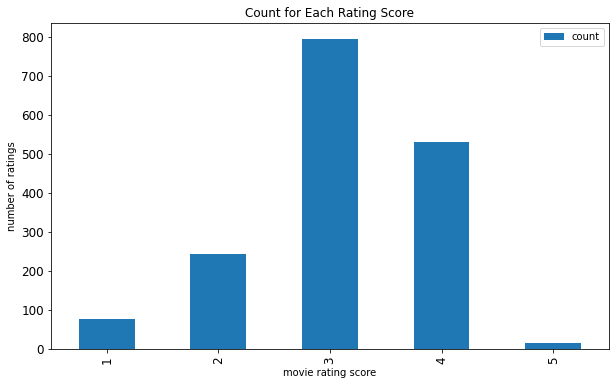

In [ ]:
# 各個電影的平均rating數(長條圖)
print("各個電影rating分布圖:")
ax = rating_count.reset_index().plot('rating','count', 'bar',figsize=(10, 6),title='Count for Each Rating Score',fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

評分區間圓餅圖

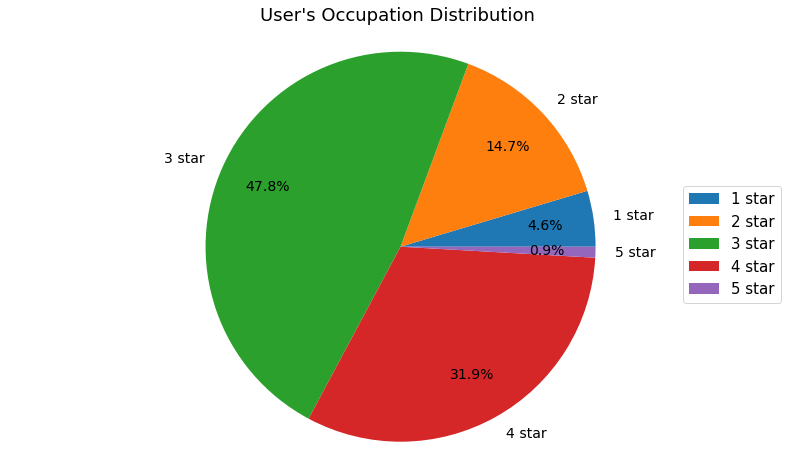

rating = 5.0 :  15  部電影
rating = 4.0 :  531  部電影
rating = 3.0 :  796  部電影
rating = 2.0 :  245  部電影
rating = 1.0 :  77  部電影


In [ ]:
names = ['1 star', '2 star', '3 star', '4 star', '5 star']
fig = plt.figure(figsize=(14,8)) 
plt.pie(rating_count["count"], labels=names,autopct ="%1.1f%%",pctdistance = 0.75,textprops = {"fontsize" : 14})
plt.title("User's Occupation Distribution",{"fontsize" : 18})
plt.legend(names)
plt.legend(loc='center right',prop = {'size':15})
plt.axis('equal')
plt.show()
for i  in range(5,0,-1):
  print("rating = %d.0 : "%i,rating_count["count"].loc[i], " 部電影")

電影觀看數排名

In [ ]:
popular_movies = merged_dataset.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)#計算rating等級的個數 由大到小排列

In [ ]:
popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['movie title', 'Number of Users watched']

In [ ]:
print("觀看數大於400的電影:")
popular_movies[popular_movies['Number of Users watched'] >= 400]

觀看數大於400的電影:


,movie title,Number of Users watched
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429


觀看數 圓餅圖

觀看數 圓餅圖：


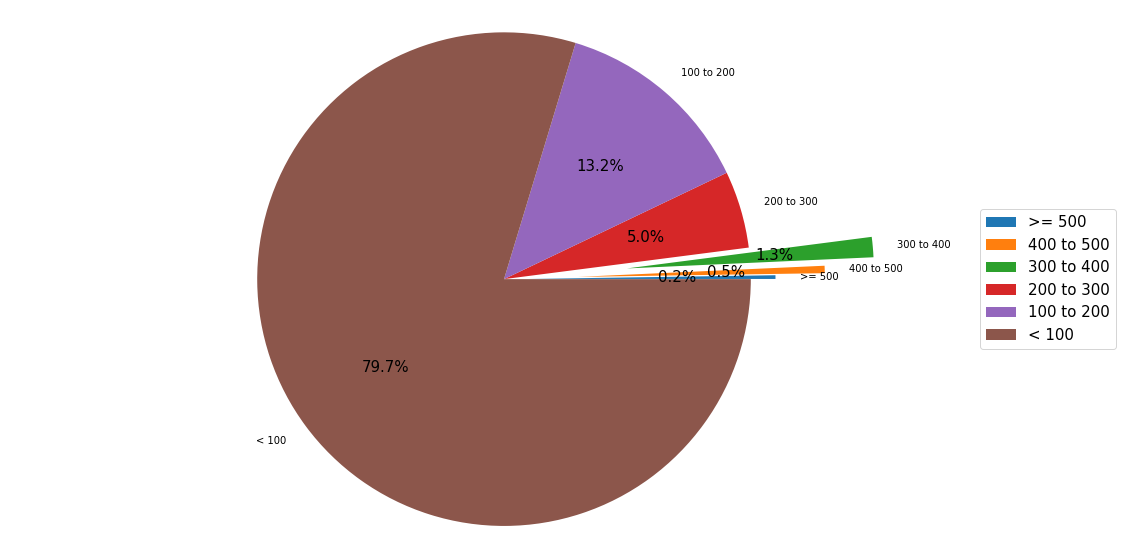

viewers >= 500 :  4  部電影
400 <= viewers < 500 :  8  部電影
300 <= viewers < 400 :  22  部電影
200 <= viewers < 300 :  84  部電影
100 <= viewers < 200 :  220  部電影
viewers < 100 :  1326  部電影


In [ ]:
print('觀看數 圓餅圖：')

names = np.array(['>= 500', '400 to 500', '300 to 400', '200 to 300', '100 to 200', '< 100'])
r=np.array([
      len(popular_movies[popular_movies['Number of Users watched'] >= 500]),
      len(popular_movies[(popular_movies['Number of Users watched'] >= 400) & (popular_movies['Number of Users watched'] < 500)]),
      len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)]),
      len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)]),
      len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)]),
      len(popular_movies[(popular_movies['Number of Users watched'] < 100)])
      ])
r_rate=r/np.sum(r)
explode=np.zeros((len(r)))

# 調整(避免字疊在一起)
explode[2]=0.5
explode[1]=0.3
explode[0]=0.1

plt.figure(figsize=(20, 10))
patches,l_text,p_text=plt.pie(r_rate,explode=explode,labels=names,autopct='%1.1f%%') # explode設定的值向外延伸

plt.legend(['>= 500', '400 to 500', '300 to 400', '200 to 300', '100 to 200', '< 100'])
plt.legend(loc='center right',prop = {'size':15}) # 將圖例放到圓餅圖右邊
plt.axis('equal')

# p_text：圓餅圖內的文字大小
for t in p_text:
    t.set_size(15)

# l_text：圓餅圖外的文字大小
for t in l_text:
    t.set_size(10)
    
plt.show()

print("viewers >= 500 : ",len(popular_movies[popular_movies['Number of Users watched'] >= 500]), " 部電影")
print("400 <= viewers < 500 : ",len(popular_movies[(popular_movies['Number of Users watched'] >= 400) & (popular_movies['Number of Users watched'] < 500)]), " 部電影")
print("300 <= viewers < 400 : ",len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)]), " 部電影")
print("200 <= viewers < 300 : ",len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)]), " 部電影")
print("100 <= viewers < 200 : ",len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)]), " 部電影")
print("viewers < 100 : ", len(popular_movies[(popular_movies['Number of Users watched'] < 100)]), " 部電影")

電影種類數量

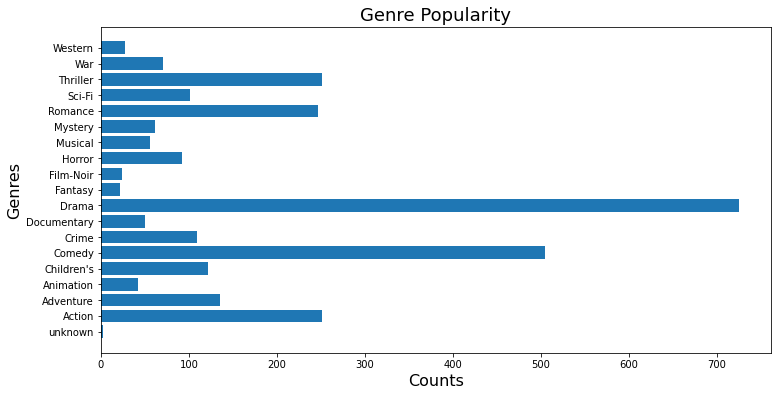

觀看最多的電影類型: Drama 共 725 人


In [ ]:
label= movies.loc[:, "unknown":].sum().index #種類名稱
label_counts= movies.loc[:, "unknown":].sum().values #各個種類的個數

plt.figure(figsize=(12, 6))
plt.barh(y= label, width= label_counts)
plt.title("Genre Popularity", fontsize=18)
plt.ylabel("Genres", fontsize=16)
plt.xlabel("Counts", fontsize=16)

plt.show()
df = pd.DataFrame(label,label_counts)
print("觀看最多的電影類型:",df[0].loc[label_counts.max()],"共", label_counts.max(),"人")

電影各種類男女比

In [ ]:
# 將 rating, users, movies 合併在一起
full = pd.merge(users, rating, how="left", on="user id")
full = pd.merge(full, movies, how="left", right_on="movie id", left_on="movie id")

In [ ]:
genres = list(movie_set_genre.columns)

各電影種類男女比：


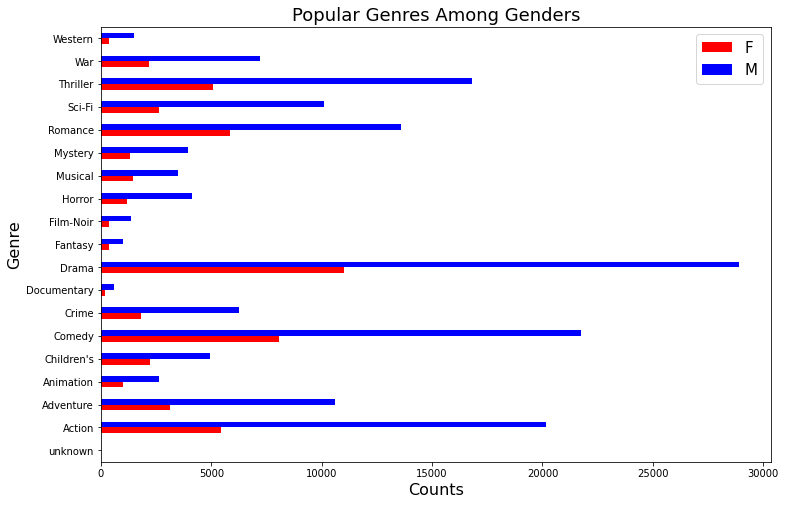

各電影種類男女人數表：


,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,
F,2,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,8,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [ ]:
print("各電影種類男女比：")
full[genres+["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12,8), color=["red", "blue"]) # kind="barh"：將直方圖轉成橫的
plt.legend(prop = {'size':15})
plt.xlabel("Counts",fontsize=16)
plt.ylabel("Genre", fontsize=16)
plt.title("Popular Genres Among Genders", fontsize=18)
plt.show()

print("各電影種類男女人數表：")
count = full[genres+["gender"]].groupby("gender").sum()
count[genres]
count

In [ ]:
g = np.amax(count, axis = 1)
#g
print("最受女性歡迎的電影類型：Drama, 總數：", g[0])
print("最受男性歡迎的電影類型：Drama, 總數：", g[1])

最受女性歡迎的電影類型：Drama, 總數： 11008
最受男性歡迎的電影類型：Drama, 總數： 28887


各電影種類之評分密度圖

各電影種類rating密度圖：


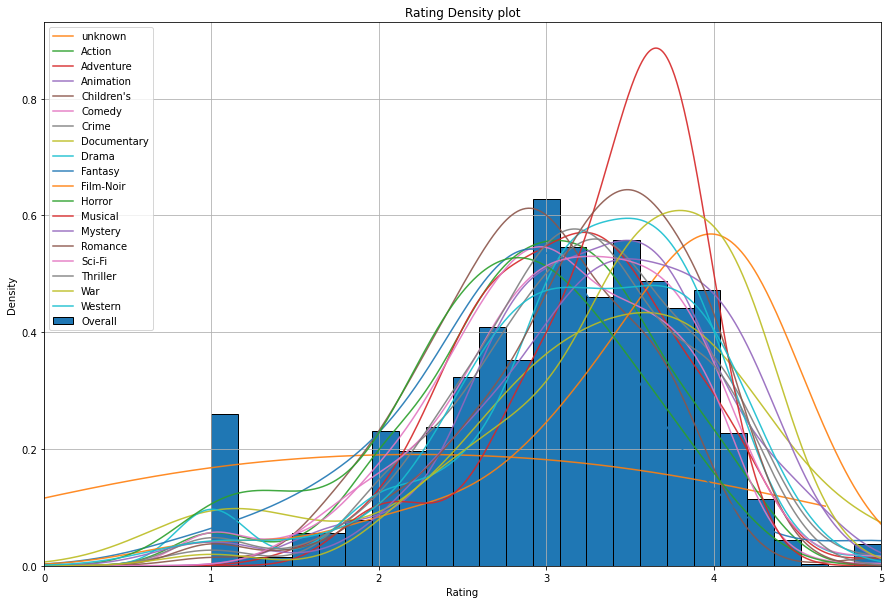

In [ ]:
# 各電影種類rating密度圖(透過密度圖觀察變數分布)

print("各電影種類rating密度圖：")

# 每個item_id的rating取均值
df_temp = full[['movie id','rating']].groupby('movie id').mean()

# 分25個區間，將直方圖轉成密度直方圖密度(density=True)
df_temp.hist(bins=25, grid=False, edgecolor='k', density=True, label ='Overall', figsize=(15,10)) # grid：是否顯示背景的網格

for i in genres:
    tmp = full[full[i]==True][['movie id','rating']].groupby('movie id').mean()
    tmp.rating.plot(grid=True, alpha=0.9, kind='kde', label=i) # alpha：圖表的透明度(0-1)、kind='kde'生成密度圖
    
plt.legend()
plt.xlim(0,5)
plt.xlabel('Rating')
plt.title('Rating Density plot')
plt.show()

電影發布時間

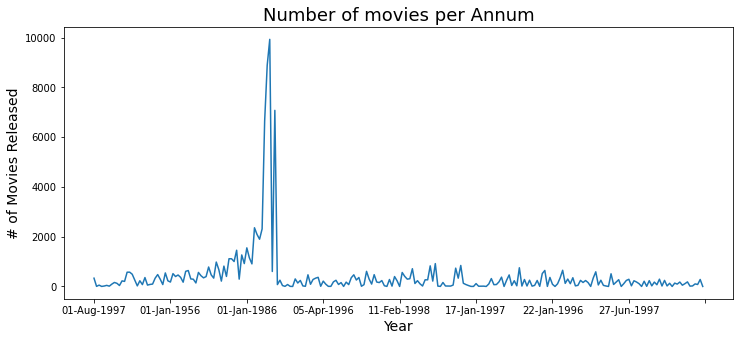

發行最多電影日期: 01-Jan-1995 共 9932 部


In [ ]:
full["year"] = full["movie title"].str.extract("\((\d{4})\)", expand=True)

year_counts = full[["movie title", "release date"]].groupby("release date").size()
fig, ax = plt.subplots(figsize=(12, 5)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(9)) # changes the number of xticks we see
plt.title("Number of movies per Annum", fontsize=18)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("# of Movies Released", fontsize=14)
plt.show()
df = pd.DataFrame(year_counts.index,year_counts.values)
print("發行最多電影日期:",df["release date"].loc[year_counts.values.max()],"共", year_counts.values.max(),"部")

# **Recommendation**



# **Input**

In [ ]:
user_input = str(input("輸入查看的 user id :"))

輸入查看的 user id :2


In [ ]:
item_input = int(input("輸入想推薦的電影個數 :"))

輸入想推薦的電影個數 :10


# **User-based neighborhood CF(pearson_baseline)**

In [ ]:
from surprise import Dataset, KNNBaseline, SVD, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split

reader = Reader(line_format="user item rating timestamp", sep="\t")
data = Dataset.load_from_file("/content/drive/MyDrive/Recommendation System/u.data", reader=reader)

In [ ]:
#全轉成字串 因為在CF使用字串判斷
rat = rating.astype(str)
mov = movies.astype(str)

In [ ]:
#建立movie的字典 (id : title)
movie_dict = { mov.loc[x, 'movie id']: mov.loc[x, 'movie title'] for x in range(len(mov)) }

In [ ]:
# user-based ,pearson_baseline
user_based_sim_option = {'name': 'pearson_baseline', 'user_based': True}
#為user推薦n部電影，基於user的協同過濾
#先找相似度最高的10個user，把這些用戶評分高的電影加入推薦名單 

def get_similar_users(uid, n = 10):
    trainset = data.build_full_trainset() #取全部的data做training set
    algo = KNNBaseline(sim_option = user_based_sim_option) #使用 user_based KNNBaseline 算法
    algo.fit(trainset) #模型擬合
    
    inner_id = algo.trainset.to_inner_uid(uid) #將 原始id 轉換成 內部id
    neighbors = algo.get_neighbors(inner_id, k=10) #使用 get_neighbors 找最相似的10個鄰居user
    neighbors_uid = ( algo.trainset.to_raw_uid(x) for x in neighbors ) #將 內部id 轉回 原始id  是個 generator
    recommendations = set()
    #找 rating = 5 的電影 ，並加入到 recommendations 中
    for user in neighbors_uid: 
        if len(recommendations) > n:
            break
        item = rat[rat['user id']==user] #集結同user的rating
        item = item[item['rating']=='5']['movie id'] #挑選rating=5的電影
        for i in item:
            recommendations.add(movie_dict[i])
    return recommendations #回傳推薦的清單 (推薦 n個 user neighbor, rating = 5 的電影)

In [ ]:
recommend_user = get_similar_users(user_input,item_input) #user-based的推薦清單

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


# **Item-based neighborhood CF(pearson_baseline)**

In [ ]:
from surprise import Dataset, KNNBaseline, SVD, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split

# item-based ,cosine
item_based_sim_option = {'name': 'pearson_baseline', 'user_based': False}
#基於item的協同過濾 , 找相似度最高的n個電影

def get_similar_items(iid,flag = 0, n = 10):  # flag = 0 會印出與目標電影相似度最好的n個電影
    trainset = data.build_full_trainset()
    algo = KNNBaseline(sim_option = item_based_sim_option)#使用 item_based KNNBaseline 算法
    algo.fit(trainset)
    inner_id = algo.trainset.to_inner_iid(iid) #將 原始id 轉換成 內部id
    neighbors = algo.get_neighbors(inner_id, k=n) #使用 get_neighbors 找最相似的10個鄰居電影
    neighbors_iid = ( algo.trainset.to_raw_iid(x) for x in neighbors ) #將 內部id 轉回 原始id
    recommendations = [ movie_dict[x] for x in neighbors_iid ] #type : list
    if(flag == 1):   # flag = 1 回傳推薦清單
        return recommendations 
    print('\n與"%s"最相似的' % movie_dict[iid],n,"部電影:")
    j = 1
    for i in recommendations:
        if j < 10:
            print("",j,":",i)
        else:
            print(j,":",i)
        j=j+1

In [ ]:
from collections import Counter
def get_user_item(uid,n = 10):
    item = rat[rat['user id']==uid] #集結同user的rating
    item = item[item['rating']=='5']['movie id'] #挑選rating=5的電影
    List = []
    for i in item: 
        recommend = get_similar_items(i,1,n) #尋找rating=5的鄰居
        for word in recommend:
            if word not in item:  #鄰居不能在item中
                    List.append(word)
    a = Counter(List)#計算與item中的電影具有高相似度的次數
    a = sorted(a.items(), key=lambda x: x[1], reverse=True)#由大到小排列
    a = list(dict(a[:n]).keys())
    return a #回傳推薦清單 
    

In [ ]:
recommend_item = get_user_item(user_input,item_input)#item-based的推薦清單

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

# **SVD (Model-based Filtering)**

In [ ]:
#預測所有user的電影評分，把每個user評分最高的n部電影加入dict
def get_recommendations_dict(n = 10):
    trainset, testset = train_test_split(data, test_size=.25)
    algo = SVD()#使用SVD 奇異值分解
    predictions = algo.fit(trainset).test(testset)# 預測
    #accuracy.rmse(predictions)# 均方根誤差
    user_recommendations = collections.defaultdict(list)# dict保存每個user評分最高的10個電影
    for uid, iid, r_ui, est, details in predictions:
        user_recommendations[uid].append((iid, est))# 加進uid的user_recommendations
    for uid, user_ratings in user_recommendations.items():
        user_ratings.sort(key = lambda x: x[1], reverse=True)#按照rating大到小排列
        user_recommendations[uid] = user_ratings[:n]
    return user_recommendations

In [ ]:
# 得到每個user評分最高的 item_input 個電影
user_recommendations = get_recommendations_dict(item_input)

In [ ]:
# 顯示為user推薦的電影名
def rec_for_user(uid):
    print('推薦給user%s的電影清單:'%uid)
    j = 1
    for i in user_recommendations[uid]:
        if j < 10:
            print("",j,":",movie_dict[i[0]])
        else:
            print(j,":",movie_dict[i[0]])
        j=j+1

In [ ]:
def print_rec(recommend,uid,n = 10):
  print('推薦給user%s的電影清單:'%uid)
  for i ,j in enumerate(list(recommend)):
      if i >= n:
        break
      if i < 9:
          print("",i+1,":",j)
      else:
          print(i+1,":",j)

In [ ]:
print("使用 User-based neighborhood CF :")
print_rec(recommend_user,user_input,item_input)
print("- - - - - - - - - - - - - - - - - - - - - - - - -")
print("使用 Item-based neighborhood CF :")
print_rec(recommend_item,user_input,item_input)
print("- - - - - - - - - - - - - - - - - - - - - - - - -")
print("使用 SVD (Model-based Filtering) :")
rec_for_user(user_input) 

使用 User-based neighborhood CF :
推薦給user2的電影清單:
 1 : Jungle Book, The (1994)
 2 : Wings of Desire (1987)
 3 : Gone with the Wind (1939)
 4 : Last of the Mohicans, The (1992)
 5 : Deer Hunter, The (1978)
 6 : Innocents, The (1961)
 7 : Babe (1995)
 8 : Butch Cassidy and the Sundance Kid (1969)
 9 : Man Who Would Be King, The (1975)
10 : Delta of Venus (1994)
- - - - - - - - - - - - - - - - - - - - - - - - -
使用 Item-based neighborhood CF :
推薦給user2的電影清單:
 1 : Get on the Bus (1996)
 2 : Chasing Amy (1997)
 3 : Bushwhacked (1995)
 4 : Flirting With Disaster (1996)
 5 : Wonderland (1997)
 6 : Dumbo (1941)
 7 : Field of Dreams (1989)
 8 : To Wong Foo, Thanks for Everything! Julie Newmar (1995)
 9 : Brothers McMullen, The (1995)
10 : Indian in the Cupboard, The (1995)
- - - - - - - - - - - - - - - - - - - - - - - - -
使用 SVD (Model-based Filtering) :
推薦給user2的電影清單:
 1 : Good Will Hunting (1997)
 2 : Godfather, The (1972)
 3 : Fargo (1996)
 4 : Titanic (1997)
 5 : Apt Pupil (1998)
 6 : As Good A

In [ ]:
movie_input = str(input("請輸入電影id :"))

請輸入電影id :1


In [ ]:
item_input_2 = int(input("輸入想推薦的電影個數 :"))

輸入想推薦的電影個數 :10


In [ ]:
get_similar_items(movie_input,0,item_input_2)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.

與"Toy Story (1995)"最相似的 10 部電影:
 1 : Wonderland (1997)
 2 : Delicatessen (1991)
 3 : Starship Troopers (1997)
 4 : Bridge on the River Kwai, The (1957)
 5 : Akira (1988)
 6 : Widows' Peak (1994)
 7 : Thin Man, The (1934)
 8 : Something to Talk About (1995)
 9 : Jack and Sarah (1995)
10 : Army of Darkness (1993)
